In [3]:
def mcp_neuron(inputs, weights, threshold): 
    summation = sum(i * w for i, w in zip(inputs, weights)) 
    return 1 if summation >= threshold else 0 
# AND Gate 
def AND(x1, x2): 
    return mcp_neuron([x1, x2], [1, 1], 2) 
# OR Gate 
def OR(x1, x2): 
    return mcp_neuron([x1, x2], [1, 1], 1) 
# NOT Gate 
def NOT(x1): 
    return mcp_neuron([x1], [-1], 0) 
# NOR Gate 
def NOR(x1, x2): 
    return mcp_neuron([x1, x2], [-1, -1], 0) 
# XOR Gate (using hard-coded logic) 
def XOR(x1, x2): 
    return (x1 ^ x2)  # XOR can't be represented by single-layer MCP 
# Testing 
print("AND") 
for x in [(0,0), (0,1), (1,0), (1,1)]: 
    print(f"{x} -> {AND(*x)}") 
print("\nOR") 
for x in [(0,0), (0,1), (1,0), (1,1)]: 
    print(f"{x} -> {OR(*x)}") 
print("\nNOT") 
for x in [0, 1]: 
    print(f"{x} -> {NOT(x)}") 
print("\nNOR") 
for x in [(0,0), (0,1), (1,0), (1,1)]: 
    print(f"{x} -> {NOR(*x)}") 
print("\nXOR") 
for x in [(0,0), (0,1), (1,0), (1,1)]: 
    print(f"{x} -> {XOR(*x)}")

AND
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1

OR
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1

NOT
0 -> 1
1 -> 0

NOR
(0, 0) -> 1
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 0

XOR
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


In [5]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import accuracy_score 
# 1. Load dataset (using breast cancer dataset for demonstration) 
X, y = load_breast_cancer(return_X_y=True) 
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# 2. Normalize the data (a simple standardization) 
# Avoid dividing by zero if std is 0 
X_train = (X_train - np.mean(X_train, axis=0)) / (np.std(X_train, axis=0) + 1e-8) 
X_test = (X_test - np.mean(X_test, axis=0)) / (np.std(X_test, axis=0) + 1e-8) 
class LogisticRegressionModel: 
    def __init__(self, learning_rate=0.01, num_iterations=1000): 
        self.learning_rate = learning_rate 
        self.num_iterations = num_iterations 
        self.weights = None 
        self.bias = None 
# 4. Implement forward propagation using sigmoid activation. 
    def _sigmoid(self, z): 
        return 1 / (1 + np.exp(-z)) 
    # 3. Initialize parameters (weights and bias). 
    def fit(self, X, y): 
        n_samples, n_features = X.shape 
        self.weights = np.zeros(n_features) 
        self.bias = 0 
        # 6. Perform gradient descent (backward propagation). 
        for iteration in range(self.num_iterations): 
            # Forward pass 
            linear_model = np.dot(X, self.weights) + self.bias 
            y_predicted = self._sigmoid(linear_model) 
            # 5. Compute cost (Binary Cross-Entropy) 
            # Adding a small value (1e-8) to prevent log(0) 
            cost = -np.mean(y * np.log(y_predicted + 1e-8) + (1 - y) * np.log(1 - y_predicted + 1e-8)) 
            # Backpropagation 
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y)) 
            db = (1/n_samples) * np.sum(y_predicted - y) 
            # Update parameters 
            self.weights -= self.learning_rate * dw 
            self.bias -= self.learning_rate * db 
            # Print cost every 100 iterations 
            if (iteration+1) % 100 == 0: 
                print(f"Iteration {iteration+1}/{self.num_iterations}, Cost: {cost:.4f}") 
    # 7. Predict and evaluate model performance. 
    def predict(self, X): 
        linear_model = np.dot(X, self.weights) + self.bias 
        y_predicted = self._sigmoid(linear_model) 
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted] 
        return np.array(y_predicted_cls) 
# Instantiate and train the custom model 
lr_model = LogisticRegressionModel(learning_rate=0.001, num_iterations=5000) 
lr_model.fit(X_train, y_train) 
# Predict on the test set 
y_pred = lr_model.predict(X_test) 
# Evaluate performance 
accuracy = accuracy_score(y_test, y_pred) 
print("\nModel Accuracy on Test Set:", accuracy) 

Iteration 100/5000, Cost: 0.5478
Iteration 200/5000, Cost: 0.4618
Iteration 300/5000, Cost: 0.4058
Iteration 400/5000, Cost: 0.3662
Iteration 500/5000, Cost: 0.3366
Iteration 600/5000, Cost: 0.3135
Iteration 700/5000, Cost: 0.2948
Iteration 800/5000, Cost: 0.2793
Iteration 900/5000, Cost: 0.2662
Iteration 1000/5000, Cost: 0.2550
Iteration 1100/5000, Cost: 0.2452
Iteration 1200/5000, Cost: 0.2366
Iteration 1300/5000, Cost: 0.2290
Iteration 1400/5000, Cost: 0.2221
Iteration 1500/5000, Cost: 0.2159
Iteration 1600/5000, Cost: 0.2103
Iteration 1700/5000, Cost: 0.2052
Iteration 1800/5000, Cost: 0.2004
Iteration 1900/5000, Cost: 0.1961
Iteration 2000/5000, Cost: 0.1921
Iteration 2100/5000, Cost: 0.1883
Iteration 2200/5000, Cost: 0.1848
Iteration 2300/5000, Cost: 0.1816
Iteration 2400/5000, Cost: 0.1785
Iteration 2500/5000, Cost: 0.1757
Iteration 2600/5000, Cost: 0.1730
Iteration 2700/5000, Cost: 0.1704
Iteration 2800/5000, Cost: 0.1680
Iteration 2900/5000, Cost: 0.1657
Iteration 3000/5000, Co

Epoch 0, Loss: 0.6563
Epoch 100, Loss: 0.0169
Epoch 200, Loss: 0.0076
Epoch 300, Loss: 0.0047
Epoch 400, Loss: 0.0034
Epoch 500, Loss: 0.0026
Epoch 600, Loss: 0.0021
Epoch 700, Loss: 0.0018
Epoch 800, Loss: 0.0015
Epoch 900, Loss: 0.0013
Test Accuracy: 96.49%


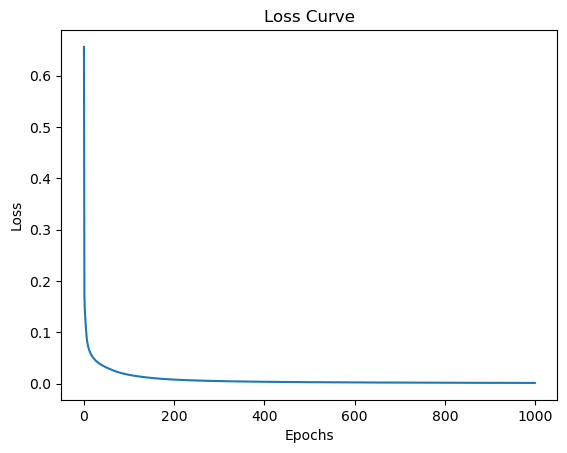

In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt 
# Load dataset 
data = load_breast_cancer() 
X = data.data 
y = data.target.reshape(-1, 1) 
# Normalize 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
# Initialize weights and biases 
input_dim = X.shape[1] 
hidden_dim = 10 
output_dim = 1 
W1 = np.random.randn(input_dim, hidden_dim) 
b1 = np.zeros((1, hidden_dim)) 
W2 = np.random.randn(hidden_dim, output_dim) 
b2 = np.zeros((1, output_dim)) 
def sigmoid(z): return 1 / (1 + np.exp(-z)) 
def tanh_derivative(a): return 1 - np.power(a, 2) 
epochs = 1000 
lr = 0.01 
losses = [] 
for epoch in range(epochs): 
    # Forward pass 
    Z1 = np.dot(X_train, W1) + b1 
    A1 = np.tanh(Z1) 
    Z2 = np.dot(A1, W2) + b2 
    A2 = sigmoid(Z2) 
    # Loss 
    loss = -np.mean(y_train * np.log(A2 + 1e-9) + (1 - y_train) * np.log(1 - A2 + 1e-9)) 
    losses.append(loss) 
    # Backward pass 
    dZ2 = A2 - y_train 
    dW2 = np.dot(A1.T, dZ2) 
    db2 = np.sum(dZ2, axis=0, keepdims=True) 
    dA1 = np.dot(dZ2, W2.T) 
    dZ1 = dA1 * tanh_derivative(A1) 
    dW1 = np.dot(X_train.T, dZ1) 
    db1 = np.sum(dZ1, axis=0) 
    # Update 
    W1 -= lr * dW1 
    b1 -= lr * db1 
    W2 -= lr * dW2 
    b2 -= lr * db2 
    if epoch % 100 == 0: 
        print(f"Epoch {epoch}, Loss: {loss:.4f}") 
# Prediction 
Z1_test = np.dot(X_test, W1) + b1 
A1_test = np.tanh(Z1_test) 
Z2_test = np.dot(A1_test, W2) + b2 
A2_test = sigmoid(Z2_test) 
y_pred = (A2_test > 0.5).astype(int) 
accuracy = np.mean(y_pred == y_test) * 100 
print(f"Test Accuracy: {accuracy:.2f}%") 
# Plot loss curve 
plt.plot(losses) 
plt.title("Loss Curve") 
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.show() 

In [7]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape(-1,28,28,1)/255.0 
X_test = X_test.reshape(-1,28,28,1)/255.0 
model = Sequential([ 
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), 
    MaxPooling2D((2,2)), 
    Flatten(), 
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax') 
]) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test)) 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 161s 14us/step


C:\Users\abish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9095 - loss: 0.3022 - val_accuracy: 0.9797 - val_loss: 0.0606
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9833 - loss: 0.0563 - val_accuracy: 0.9840 - val_loss: 0.0480
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9858 - val_loss: 0.0451
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9927 - loss: 0.0227 - val_accuracy: 0.9862 - val_loss: 0.0408
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9847 - val_loss: 0.0528


C:\Users\abish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.3589 - loss: 1.8529 - val_accuracy: 0.4612 - val_loss: 1.6028
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4097 - loss: 1.7119 - val_accuracy: 0.4612 - val_loss: 1.6371
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3898 - loss: 1.7352 - val_accuracy: 0.4612 - val_loss: 1.6391
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3738 - loss: 1.7508 - val_accuracy: 0.4612 - val_loss: 1.6506
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3953 - loss: 1.7601 - val_accuracy: 0.4612 - val_loss: 1.6151
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3746 - loss: 1.7493 - val_accuracy: 0.4612 - val_loss: 1.6025
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4054 - loss: 1.7113 - val_accuracy: 0.4612 - val_loss: 1.5948
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3711 - loss: 1.7714 - val_accuracy: 0.4612 - v

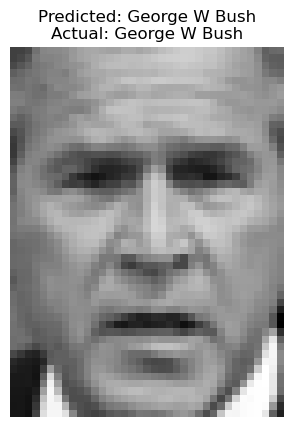

💾 Model saved as lfw_face_recognition_cnn.h5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil

# Step 1: Load LFW dataset safely
def load_lfw_data():
    try:
        # Attempt to fetch
        lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
        return lfw_data
    except Exception as e:
        print("❌ Error downloading or loading LFW dataset:", e)
        print("🧹 Attempting cleanup and retry...")
        cache_dir = os.path.expanduser('~/scikit_learn_data/lfw_home')
        if os.path.exists(cache_dir):
            shutil.rmtree(cache_dir)
            print("🗑️ Removed corrupted LFW cache. Please rerun the script.")
        else:
            print("⚠️ Cache folder not found.")
        return None

lfw_data = load_lfw_data()
if lfw_data is None:
    exit()  # Stop if dataset failed

# Step 2: Data preprocessing
X = lfw_data.images
y = lfw_data.target
target_names = lfw_data.target_names
n_classes = len(target_names)

# Normalize and reshape
X = X.reshape(-1, X.shape[1], X.shape[2], 1).astype('float32') / 255.0
y = to_categorical(y, n_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 3: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Step 4: Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train
history = model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy:.2f}")

# Step 7: Predict and visualize
def predict_and_display(index):
    sample = X_test[index].reshape(1, X.shape[1], X.shape[2], 1)
    prediction = model.predict(sample)
    predicted_label = target_names[np.argmax(prediction)]
    actual_label = target_names[np.argmax(y_test[index])]
    plt.imshow(X_test[index].reshape(X.shape[1], X.shape[2]), cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()

# Example: Show sample prediction
predict_and_display(5)

# Save the model
model.save("lfw_face_recognition_cnn.h5")
print("💾 Model saved as lfw_face_recognition_cnn.h5")
